In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format

In [2]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
sub = pd.read_csv("SampleSubmission.csv")

In [3]:
train.shape, test.shape, sub.shape

((7205, 9), (2061, 8), (2061, 2))

In [4]:
train_orig = train.copy()
test_orig = test.copy()

In [5]:
train.describe(include = 'all')

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
count,7205,7205,7205,7205,7184,7205,7188.00,7008,4845
unique,5141,3,55,1223,33,21,nan,3,3144
top,VHL12773,Lagos,Toyota,Camry,"2,008",Black,nan,Foreign Used,"75,000"
freq,5,3318,2742,651,755,2128,nan,4896,70
mean,NaN,NaN,NaN,NaN,NaN,NaN,11.85,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,25.32,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.45,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,3.50,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,5.65,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,11.66,NaN,NaN


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7205 non-null   object 
 1   Location                7205 non-null   object 
 2   Maker                   7205 non-null   object 
 3   Model                   7205 non-null   object 
 4   Year                    7184 non-null   object 
 5   Colour                  7205 non-null   object 
 6   Amount (Million Naira)  7188 non-null   float64
 7   Type                    7008 non-null   object 
 8   Distance                4845 non-null   object 
dtypes: float64(1), object(8)
memory usage: 506.7+ KB


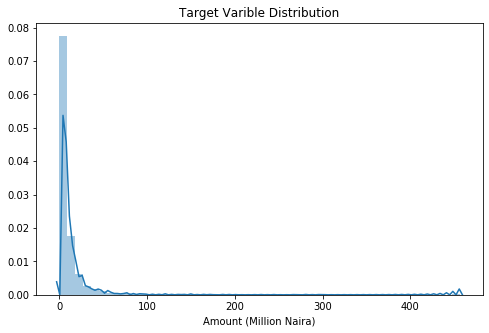

In [7]:
#Target Variable Distribution
plt.figure(figsize = (8, 5))
sns.distplot(train['Amount (Million Naira)'])
plt.title('Target Varible Distribution')
plt.show()

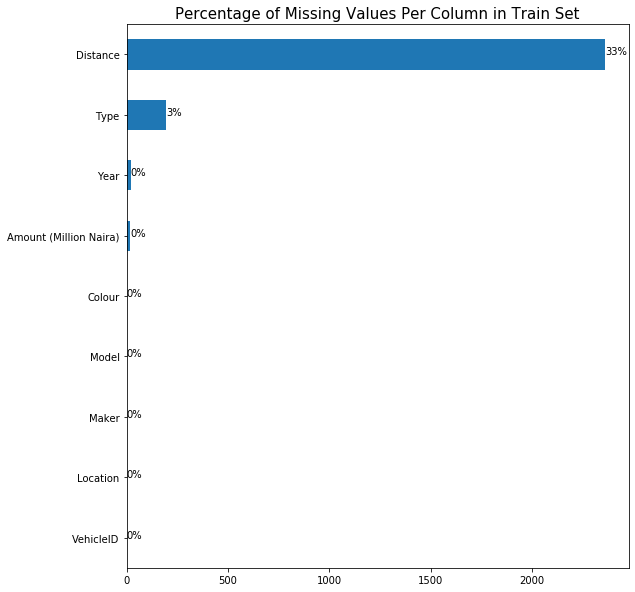

In [8]:
# Plot missing values in train set
ax = train.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

## Data Preprocessing

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
data = pd.concat([train, test]).reset_index(drop = True)
data.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.20,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,3.50,Nigerian Used,"125,000"
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,9.20,Foreign Used,"110,852"
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.80,Foreign Used,"30,000"
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,2.60,Nigerian Used,"125,206"


In [11]:
data.tail()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
9261,VHL17903,Abuja,Toyota,Avalon,"2,020",Red,nan,Foreign Used,2650.00
9262,VHL14018,Ibadan,Audi,Q5,"2,011",Blue,nan,Foreign Used,99000.00
9263,VHL17473,Ibadan,Toyota,Camry,"2,015",Black,nan,Foreign Used,108000.00
9264,VHL11480,Abuja,Lexus,IS 350 AWD,"2,013",White,nan,Foreign Used,52485.00
9265,VHL13881,Abuja,Pontiac,Torrent,"2,009",Silver,nan,Foreign Used,124088.00


In [12]:
data.shape

(9266, 9)

In [13]:
total = data.isnull().sum().sort_values(ascending=False)
percentage = ((data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100)
missing_data = pd.concat([total, percentage], axis=1, keys=['Total', 'Percentage'])
missing_data.head(20)

,Total,Percentage
Distance,3036,32.76
Amount (Million Naira),2078,22.43
Type,251,2.71
Year,23,0.25
Colour,0,0.00
Model,0,0.00
Maker,0,0.00
Location,0,0.00
VehicleID,0,0.00


In [14]:
repl = ['Distance', 'Amount (Million Naira)', 'Year']

In [15]:
for i in repl:
    data[i] = data[i].replace(',', '', regex = True)
    data[i] = data[i].apply(pd.to_numeric, errors = 'coerce')

In [16]:
data.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,2011.00,Silver,2.20,Nigerian Used,nan
1,VHL18827,Ibadan,Hyundai,Sonata,2012.00,Silver,3.50,Nigerian Used,125000.00
2,VHL19499,Lagos,Lexus,RX 350,2010.00,Red,9.20,Foreign Used,110852.00
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,2017.00,Blue,22.80,Foreign Used,30000.00
4,VHL12170,Ibadan,Toyota,Highlander,2002.00,Red,2.60,Nigerian Used,125206.00


In [17]:
data["Years_Used"] = 2022 - data['Year']
data = data.drop('Year', axis = 1)

In [18]:
data.shape

(9266, 9)

### Filling Null Values

In [19]:
data.isnull().sum().sort_values(ascending = False)

Distance                  3036
Amount (Million Naira)    2078
Type                       251
Years_Used                  23
Colour                       0
Model                        0
Maker                        0
Location                     0
VehicleID                    0
dtype: int64

In [20]:
missing_data.head()

,Total,Percentage
Distance,3036,32.76
Amount (Million Naira),2078,22.43
Type,251,2.71
Year,23,0.25
Colour,0,0.00


In [21]:
data['Amount (Million Naira)'].fillna(data['Amount (Million Naira)'].mean(), inplace = True)

data['Distance'].fillna(data['Distance'].mean(), inplace = True)


In [22]:
data.Type.mode()

0    Foreign Used
dtype: object

In [23]:
data.Years_Used.mode()

0   14.00
dtype: float64

In [24]:
data['Type'].fillna('Foreign Used', inplace = True)

data['Years_Used'].fillna(14, inplace = True)

In [25]:
data.isnull().sum()

VehicleID                 0
Location                  0
Maker                     0
Model                     0
Colour                    0
Amount (Million Naira)    0
Type                      0
Distance                  0
Years_Used                0
dtype: int64

In [26]:
data['Years_Used'].describe()

count   9266.00
mean      10.96
std        4.87
min        0.00
25%        8.00
50%       11.00
75%       14.00
max       43.00
Name: Years_Used, dtype: float64

In [27]:
data.groupby(['Type'])['Years_Used'].mean()

Type
Brand New        1.87
Foreign Used    10.48
Nigerian Used   13.34
Name: Years_Used, dtype: float64

- Idea of Binning the years_used according to Type???? Is it brilliant?
- Or just bin according to a random year, let's say cars used in 


- less than two years: new
- less than five years: fairly Used
- less than ten years: fairly Old
- greater than ten years: Old


In [28]:
### Binning

In [29]:
data.groupby(['Years_Used'])['Amount (Million Naira)', 'Distance'].mean()

,Amount (Million Naira),Distance
Years_Used,,
0.00,96.81,78149.85
1.00,78.82,52439.71
2.00,33.82,43672.91
3.00,33.66,49925.33
4.00,22.26,64462.80
5.00,19.35,69693.60
6.00,18.07,73654.63
7.00,12.50,78625.37
8.00,11.03,86496.40


In [30]:
data.groupby(['Model'])['Years_Used'].mean()

Model
1117       21.00
120i       14.00
128i        9.00
200         9.00
206        17.40
            ... 
Zafira 2   21.00
iM Base     6.00
xA Base    16.00
xB Base    14.00
xD Base    13.00
Name: Years_Used, Length: 1412, dtype: float64

### GroupBy
- Let's Get some things using the groupby column
- Columns To Focus on [Years Used, Model, Maker, Type]

GroupBy Functions
- .min()
- .max()
- .mean()
- .count()
- .median()

In [31]:
data.groupby(['Type'])['Amount (Million Naira)'].sum()

Type
Brand New       19560.98
Foreign Used    75036.14
Nigerian Used   15186.44
Name: Amount (Million Naira), dtype: float64

In [32]:
data.groupby(['Type'])['Amount (Million Naira)', 'Distance'].sum()

,Amount (Million Naira),Distance
Type,,
Brand New,19560.98,13635985.35
Foreign Used,75036.14,623387947.51
Nigerian Used,15186.44,320456706.19


In [33]:
data.groupby(['Type', 'Location'], as_index = False)['Amount (Million Naira)'].sum()

,Type,Location,Amount (Million Naira)
0,Brand New,Abuja,16864.54
1,Brand New,Ibadan,18.00
2,Brand New,Lagos,2678.44
3,Foreign Used,Abuja,32351.02
4,Foreign Used,Ibadan,3729.07
5,Foreign Used,Lagos,38956.05
6,Nigerian Used,Abuja,10023.39
7,Nigerian Used,Ibadan,1080.44
8,Nigerian Used,Lagos,4082.61


In [34]:
data['VehicleID'].value_counts().sort_values(ascending = False)

VHL10753    6
VHL16443    6
VHL19144    6
VHL16658    5
VHL13658    5
           ..
VHL11938    1
VHL11069    1
VHL11401    1
VHL10644    1
VHL17817    1
Name: VehicleID, Length: 6065, dtype: int64

In [35]:
data.columns

Index(['VehicleID', 'Location', 'Maker', 'Model', 'Colour',
       'Amount (Million Naira)', 'Type', 'Distance', 'Years_Used'],
      dtype='object')

In [36]:
## GroupBy on Amount(Million Naira)
# data['Amt_min'] = data['VehicleID'].map(data.groupby('VehicleID').min()['Amount (Million Naira)'])
# data['Amt_max'] = data['VehicleID'].map(data.groupby('VehicleID').max()['Amount (Million Naira)'])
# data['Amt_mean'] = data['VehicleID'].map(data.groupby('VehicleID').mean()['Amount (Million Naira)'])

# ## GroupBy on Years_Used
# data['Year_min'] = data['VehicleID'].map(data.groupby('VehicleID').min()['Years_Used'])
# data['Year_max'] = data['VehicleID'].map(data.groupby('VehicleID').max()['Years_Used'])
# data['Year_mean'] = data['VehicleID'].map(data.groupby('VehicleID').mean()['Years_Used'])

# ## GrouBy on Distance
# data['dist_min'] = data['VehicleID'].map(data.groupby('VehicleID').min()['Distance'])
# data['dist_max'] = data['VehicleID'].map(data.groupby('VehicleID').max()['Distance'])
# data['dist_mean'] = data['VehicleID'].map(data.groupby('VehicleID').mean()['Distance'])

In [37]:
dp = pd.DataFrame()

In [38]:
## GroupBy on Amount
dp['Amt_min'] = data['VehicleID'].map(data.groupby(['VehicleID'])['Amount (Million Naira)'].min())
dp['Amt_max'] = data['VehicleID'].map(data.groupby(['VehicleID'])['Amount (Million Naira)'].max())
dp['Amt_mean'] = data['VehicleID'].map(data.groupby(['VehicleID'])['Amount (Million Naira)'].mean())

## GrouBy on Years_Used
dp['Year_min'] = data['VehicleID'].map(data.groupby(['VehicleID'])['Years_Used'].min())
dp['Year_max'] = data['VehicleID'].map(data.groupby(['VehicleID'])['Years_Used'].max())
dp['Year_mean'] = data['VehicleID'].map(data.groupby(['VehicleID'])['Years_Used'].mean())

## GroupBy on Distance
dp['dist_min'] = data['VehicleID'].map(data.groupby(['VehicleID'])['Distance'].min())
dp['dist_max'] = data['VehicleID'].map(data.groupby(['VehicleID'])['Distance'].max())
dp['dist_mean'] = data['VehicleID'].map(data.groupby(['VehicleID'])['Distance'].mean())


In [39]:
dp.isnull().sum()

Amt_min      0
Amt_max      0
Amt_mean     0
Year_min     0
Year_max     0
Year_mean    0
dist_min     0
dist_max     0
dist_mean    0
dtype: int64

In [40]:
dp.describe()

,Amt_min,Amt_max,Amt_mean,Year_min,Year_max,Year_mean,dist_min,dist_max,dist_mean
count,9266.00,9266.00,9266.00,9266.00,9266.00,9266.00,9266.00,9266.00,9266.00
mean,7.82,17.09,11.85,8.86,13.04,10.96,79475.84,130472.30,103332.68
std,15.70,30.14,18.16,4.67,4.61,3.90,66652.87,125196.55,74849.96
min,0.45,0.45,0.45,0.00,0.00,0.00,1.00,2.00,2.00
25%,3.00,6.30,5.35,5.00,10.00,8.50,47000.00,96000.00,73561.56
50%,4.80,11.85,8.65,9.00,14.00,11.00,78535.00,103332.68,96854.67
75%,10.84,14.50,11.85,12.00,16.00,13.67,103332.68,125678.00,104817.67
max,454.00,456.00,454.00,40.00,43.00,40.00,1985400.00,1985400.00,1985400.00


In [41]:
#Mean_Amount = data['VehicleID'].map(datagroupby('VehicleID').mean()['Amount (Million Naira)'])

In [42]:
## GroupBy on Amount
data['Amt_min'] = data['VehicleID'].map(data.groupby(['VehicleID'])['Amount (Million Naira)'].min())
data['Amt_max'] = data['VehicleID'].map(data.groupby(['VehicleID'])['Amount (Million Naira)'].max())
data['Amt_mean'] = data['VehicleID'].map(data.groupby(['VehicleID'])['Amount (Million Naira)'].mean())

## GrouBy on Years_Used
data['Year_min'] = data['VehicleID'].map(data.groupby(['VehicleID'])['Years_Used'].min())
data['Year_max'] = data['VehicleID'].map(data.groupby(['VehicleID'])['Years_Used'].max())
data['Year_mean'] = data['VehicleID'].map(data.groupby(['VehicleID'])['Years_Used'].mean())

## GroupBy on Distance
data['dist_min'] = data['VehicleID'].map(data.groupby(['VehicleID'])['Distance'].min())
data['dist_max'] = data['VehicleID'].map(data.groupby(['VehicleID'])['Distance'].max())
data['dist_mean'] = data['VehicleID'].map(data.groupby(['VehicleID'])['Distance'].mean())



### Trying to Drop Outliers

- Checking the Distance and Amount Column

In [43]:
data[['Distance', 'Amount (Million Naira)']].describe()

,Distance,Amount (Million Naira)
count,9266.00,9266.00
mean,103332.68,11.85
std,94835.35,22.30
min,1.00,0.45
25%,67174.00,4.00
50%,103332.68,8.00
75%,103332.68,11.85
max,1985400.00,456.00


In [44]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code

In [45]:
sample_outliers = detect_outliers_zscore(data['Distance'])
print("Outliers from Z-scores method: ", sample_outliers)


Outliers from Z-scores method:  [895236.0, 397157.0, 700010.0, 392793.0, 467397.0, 786123.0, 742111.0, 922382.0, 608752.0, 854236.0, 631970.0, 491836.0, 952388.0, 687452.0, 1413435.0, 823102.0, 963200.0, 1284898.0, 895231.0, 1230000.0, 754365.0, 985231.0, 410381.0, 805624.0, 471102.0, 980801.0, 925343.0, 850000.0, 396182.0, 1250000.0, 604158.0, 923500.0, 895421.0, 984512.0, 482800.0, 478621.0, 504000.0, 865421.0, 1321100.0, 965604.0, 509124.0, 865241.0, 526558.0, 482800.0, 895855.0, 714352.0, 401142.0, 425530.0, 758288.0, 619358.0, 482800.0, 980001.0, 437109.0, 895623.0, 401581.0, 987542.0, 1097611.0, 1052375.0, 491836.0, 1324810.0, 895412.0, 412753.0, 895421.0, 854337.0, 451214.0, 864542.0, 1321211.0, 750454.0, 856321.0, 482800.0, 487321.0, 700000.0, 391385.0, 1985400.0, 420000.0, 1123856.0, 807523.0, 902471.0, 985123.0, 394996.0, 429408.0, 985231.0, 458478.0, 499247.0, 436766.0, 610181.0, 985236.0, 999999.0, 952423.0, 987542.0, 407060.0, 396280.0, 965231.0, 405688.0, 411099.0, 896413

In [46]:
len(sample_outliers)

113

In [47]:
data = data[data["Distance"]<min(sample_outliers)].reset_index(drop = True)

In [48]:
data.shape

(9153, 18)

In [49]:
data[['Distance', 'Amount (Million Naira)']].describe()

,Distance,Amount (Million Naira)
count,9153.00,9153.00
mean,95263.79,11.91
std,52334.65,22.40
min,1.00,0.45
25%,65923.00,4.02
50%,103332.68,8.10
75%,103332.68,11.85
max,387265.00,456.00


In [50]:
data.corr()

,Amount (Million Naira),Distance,Years_Used,Amt_min,Amt_max,Amt_mean,Year_min,Year_max,Year_mean,dist_min,dist_max,dist_mean
Amount (Million Naira),1.00,-0.18,-0.40,0.68,0.71,0.82,-0.30,-0.22,-0.31,-0.14,-0.04,-0.10
Distance,-0.18,1.00,0.45,-0.11,-0.11,-0.14,0.30,0.29,0.35,0.67,0.39,0.65
Years_Used,-0.40,0.45,1.00,-0.27,-0.25,-0.31,0.67,0.67,0.80,0.32,0.16,0.28
Amt_min,0.68,-0.11,-0.27,1.00,0.47,0.83,-0.19,-0.37,-0.34,-0.05,-0.12,-0.12
Amt_max,0.71,-0.11,-0.25,0.47,1.00,0.86,-0.40,-0.12,-0.31,-0.22,0.00,-0.10
Amt_mean,0.82,-0.14,-0.31,0.83,0.86,1.00,-0.37,-0.28,-0.39,-0.17,-0.06,-0.13
Year_min,-0.30,0.30,0.67,-0.19,-0.40,-0.37,1.00,0.43,0.84,0.52,0.06,0.30
Year_max,-0.22,0.29,0.67,-0.37,-0.12,-0.28,0.43,1.00,0.84,0.14,0.31,0.33
Year_mean,-0.31,0.35,0.80,-0.34,-0.31,-0.39,0.84,0.84,1.00,0.40,0.22,0.37
dist_min,-0.14,0.67,0.32,-0.05,-0.22,-0.17,0.52,0.14,0.40,1.00,0.23,0.67


### Encoding Categorical Variables

In [51]:
data.head()

,VehicleID,Location,Maker,Model,Colour,Amount (Million Naira),Type,Distance,Years_Used,Amt_min,Amt_max,Amt_mean,Year_min,Year_max,Year_mean,dist_min,dist_max,dist_mean
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,Silver,2.20,Nigerian Used,103332.68,11.00,2.20,11.30,8.23,7.00,11.00,9.33,103332.68,103332.68,103332.68
1,VHL18827,Ibadan,Hyundai,Sonata,Silver,3.50,Nigerian Used,125000.00,10.00,3.50,3.50,3.50,10.00,10.00,10.00,125000.00,125000.00,125000.00
2,VHL19499,Lagos,Lexus,RX 350,Red,9.20,Foreign Used,110852.00,12.00,9.20,200.00,104.60,1.00,12.00,6.50,103332.68,110852.00,107092.34
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,Blue,22.80,Foreign Used,30000.00,5.00,22.80,22.80,22.80,5.00,5.00,5.00,30000.00,30000.00,30000.00
4,VHL12170,Ibadan,Toyota,Highlander,Red,2.60,Nigerian Used,125206.00,20.00,2.60,2.60,2.60,20.00,20.00,20.00,125206.00,125206.00,125206.00


In [52]:
cat = ['Location', 'Maker', 'Model', 'Colour', 'Type']

In [53]:
for i in cat:
    le = LabelEncoder()
    data[i] = le.fit_transform(data[i])

In [54]:
data.head()

,VehicleID,Location,Maker,Model,Colour,Amount (Million Naira),Type,Distance,Years_Used,Amt_min,Amt_max,Amt_mean,Year_min,Year_max,Year_mean,dist_min,dist_max,dist_mean
0,VHL12546,0,17,138,18,2.20,2,103332.68,11.00,2.20,11.30,8.23,7.00,11.00,9.33,103332.68,103332.68,103332.68
1,VHL18827,1,19,1191,18,3.50,2,125000.00,10.00,3.50,3.50,3.50,10.00,10.00,10.00,125000.00,125000.00,125000.00
2,VHL19499,2,29,1028,17,9.20,1,110852.00,12.00,9.20,200.00,104.60,1.00,12.00,6.50,103332.68,110852.00,107092.34
3,VHL17991,0,34,580,3,22.80,1,30000.00,5.00,22.80,22.80,22.80,5.00,5.00,5.00,30000.00,30000.00,30000.00
4,VHL12170,1,53,649,17,2.60,2,125206.00,20.00,2.60,2.60,2.60,20.00,20.00,20.00,125206.00,125206.00,125206.00


In [55]:
#data['Type'] = le.fit_transform(data['Type'])

### Splliting and Preparing for Modelling

In [56]:
df  = data[:train.shape[0]]
df1 = data[train.shape[0]:]

In [57]:
df.shape, df1.shape

((7205, 18), (1948, 18))

In [58]:
df = df.drop('VehicleID', axis = 1)
df1 = df1.drop(columns = ['VehicleID', 'Amount (Million Naira)']).reset_index(drop = True)

In [59]:
df.head()

,Location,Maker,Model,Colour,Amount (Million Naira),Type,Distance,Years_Used,Amt_min,Amt_max,Amt_mean,Year_min,Year_max,Year_mean,dist_min,dist_max,dist_mean
0,0,17,138,18,2.20,2,103332.68,11.00,2.20,11.30,8.23,7.00,11.00,9.33,103332.68,103332.68,103332.68
1,1,19,1191,18,3.50,2,125000.00,10.00,3.50,3.50,3.50,10.00,10.00,10.00,125000.00,125000.00,125000.00
2,2,29,1028,17,9.20,1,110852.00,12.00,9.20,200.00,104.60,1.00,12.00,6.50,103332.68,110852.00,107092.34
3,0,34,580,3,22.80,1,30000.00,5.00,22.80,22.80,22.80,5.00,5.00,5.00,30000.00,30000.00,30000.00
4,1,53,649,17,2.60,2,125206.00,20.00,2.60,2.60,2.60,20.00,20.00,20.00,125206.00,125206.00,125206.00


In [60]:
df1.head()

,Location,Maker,Model,Colour,Type,Distance,Years_Used,Amt_min,Amt_max,Amt_mean,Year_min,Year_max,Year_mean,dist_min,dist_max,dist_mean
0,2,53,659,18,1,103332.68,9.00,11.85,11.85,11.85,9.00,14.00,11.50,103332.68,103332.68,103332.68
1,0,19,1136,4,2,63582.00,10.00,3.60,11.85,7.72,10.00,18.00,14.00,63582.00,124146.00,93864.00
2,0,29,1023,3,2,74512.00,18.00,11.85,11.85,11.85,18.00,18.00,18.00,74512.00,74512.00,74512.00
3,1,54,1150,18,1,103332.68,21.00,1.35,19.50,10.90,5.00,21.00,14.00,103332.68,362319.00,189661.46
4,1,53,399,3,1,110852.00,8.00,11.85,20.00,15.92,4.00,8.00,6.00,45000.00,110852.00,77926.00


In [61]:
df.shape, df1.shape

((7205, 17), (1948, 16))

In [62]:
df.describe()

,Location,Maker,Model,Colour,Amount (Million Naira),Type,Distance,Years_Used,Amt_min,Amt_max,Amt_mean,Year_min,Year_max,Year_mean,dist_min,dist_max,dist_mean
count,7205.00,7205.00,7205.00,7205.00,7205.00,7205.00,7205.00,7205.00,7205.00,7205.00,7205.00,7205.00,7205.00,7205.00,7205.00,7205.00,7205.00
mean,1.00,37.11,648.41,10.16,11.93,1.23,94756.79,10.93,7.58,17.61,11.89,8.84,13.04,10.96,76286.49,122282.56,97978.87
std,0.96,14.71,353.55,7.61,25.25,0.49,51404.25,4.83,17.67,32.28,20.10,4.66,4.57,3.88,46129.63,97790.50,50856.16
min,0.00,0.00,0.00,1.00,0.45,0.00,1.00,0.00,0.45,0.45,0.45,0.00,0.00,0.00,1.00,2.00,2.00
25%,0.00,29.00,332.00,2.00,3.55,1.00,65923.00,8.00,2.81,5.30,4.60,5.00,10.00,8.50,46052.00,95873.00,73453.00
50%,1.00,34.00,600.00,9.00,5.80,1.00,103332.68,11.00,4.35,11.85,7.72,9.00,14.00,11.00,78000.00,103332.68,96166.34
75%,2.00,53.00,974.00,18.00,11.85,2.00,103332.68,14.00,7.31,16.85,12.32,12.00,16.00,13.67,103332.68,124103.00,103332.68
max,2.00,55.00,1393.00,23.00,456.00,2.00,387265.00,43.00,454.00,456.00,454.00,36.00,43.00,36.00,377520.00,1413435.00,679949.00


## Modelling

In [63]:
X = df.drop(columns = ['Amount (Million Naira)'])

y = df['Amount (Million Naira)']

In [64]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, StratifiedKFold
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

### Fitting CTB Fake

### Fitting CatBoost 1

In [65]:
fold_pred_ctb=[]
oof_pred_ctb = []

params = {
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators' : 2000,
 'use_best_model': True
 }




fold= KFold(n_splits = 10)#15#5#10
i=1
for train_index, test_index in fold.split(X,y):     
  
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = np.log1p(y.iloc[train_index]), y.iloc[test_index]

    model = CatBoostRegressor(**params, eval_metric = 'RMSE')
    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=300, verbose = False)#erly100

    preds= model.predict(X_test)
    print("RMSE: ", np.sqrt(mean_squared_error(y_test, np.expm1(preds))))  #Reverse transformation
    oof_pred_ctb.append(np.sqrt(mean_squared_error(y_test, np.expm1(preds))))
    p2 = model.predict(df1[X.columns])
    fold_pred_ctb.append(np.expm1(p2))
    

print(np.mean(oof_pred_ctb))

RMSE:  4.296926740644816
RMSE:  5.528510107630907
RMSE:  5.502268779857513
RMSE:  4.953079510811846
RMSE:  8.120474962387979
RMSE:  5.922019947022474
RMSE:  4.232398295361029
RMSE:  9.450569681839607
RMSE:  4.3233708945487574
RMSE:  9.44185615505166
6.177147507515659


### Fitting LGBM 1

In [78]:
fold_pred_lgb = []
oof_pred_lgb = []

params = {
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators' : 2000,
 'use_best_model': True
 }




fold= KFold(n_splits = 5)#15#5#10
i=1
for train_index, test_index in fold.split(X,y):     
  
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = np.log1p(y.iloc[train_index]), y.iloc[test_index]

    model = LGBMRegressor(**params, eval_metric = 'RMSE')
    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=300, verbose = False)#erly100

    preds= model.predict(X_test)
    print("RMSE: ", np.sqrt(mean_squared_error(y_test, np.expm1(preds))))  #Reverse transformation
    oof_pred_lgb.append(np.sqrt(mean_squared_error(y_test, np.expm1(preds))))
    p2 = model.predict(df1[X.columns])
    fold_pred_lgb.append(np.expm1(p2))
    

print(np.mean(oof_pred_lgb))

RMSE:  5.200427931494169
RMSE:  5.877272030463539
RMSE:  6.625632731796901
RMSE:  5.847005881937475
RMSE:  7.658313960230916
6.2417305071846005


In [81]:
np.mean(oof_pred_lgb)

6.2417305071846005

### Fitting XGBoost

In [73]:
fold_pred_xgb=[]
oof_pred_xgb = []

params = {
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators' : 2000
 }




fold= KFold(n_splits = 5)#15#5#10
i=1
for train_index, test_index in fold.split(X,y):     
  
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = np.log1p(y.iloc[train_index]), y.iloc[test_index]

    model = XGBRegressor(**params)
    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=300, verbose = False)#erly100

    preds= model.predict(X_test)
    print("RMSE: ", np.sqrt(mean_squared_error(y_test, np.expm1(preds))))  #Reverse transformation
    oof_pred_xgb.append(np.sqrt(mean_squared_error(y_test, np.expm1(preds))))
    p2 = model.predict(df1[X.columns])
    fold_pred_xgb.append(np.expm1(p2))
    

print(np.mean(oof_pred_xgb))

[17:11:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE:  6.977059056275986
[17:11:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE:  12.191037851160708
[17:12:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE:  8.775186775030086
[17:12:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE:  12.423169735588212
[17:13:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE:  15.851294515553972
11.243549586721794


### Fitting GradientBoost

In [78]:
fold_pred_gbr=[]
oof_pred_gbr = []

params = {
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators' : 2000
 }




fold= KFold(n_splits = 5)#15#5#10
i=1
for train_index, test_index in fold.split(X,y):     
  
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = np.log1p(y.iloc[train_index]), y.iloc[test_index]

    model = GradientBoostingRegressor(**params)
    model.fit(X_train,y_train)#erly100

    preds= model.predict(X_test)
    print("RMSE: ", np.sqrt(mean_squared_error(y_test, np.expm1(preds))))  #Reverse transformation
    oof_pred_gbr.append(np.sqrt(mean_squared_error(y_test, np.expm1(preds))))
    p2 = model.predict(df1[X.columns])
    fold_pred_gbr.append(np.expm1(p2))
    

print(np.mean(oof_pred_gbr))

RMSE:  7.326019528588357
RMSE:  12.206415142852894
RMSE:  8.294327335799952
RMSE:  12.111850356138717
RMSE:  16.404122097102874
11.268546892096557


In [76]:
print(np.mean(oof_pred_gbr))

11.243549586721794


### Fitting RandomForestRegressor

In [ ]:
fold_pred_rdr = []
oof_pred_rdr = []

params = {
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators' : 2000
 }




fold= KFold(n_splits = 5)#15#5#10
i=1
for train_index, test_index in fold.split(X,y):     
  
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = np.log1p(y.iloc[train_index]), y.iloc[test_index]

    model = RandomForestRegressor(**params)
    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=300, verbose = False)#erly100

    preds= model.predict(X_test)
    print("RMSE: ", np.sqrt(mean_squared_error(y_test, np.expm1(preds))))  #Reverse transformation
    oof_pred_rdr.append(np.sqrt(mean_squared_error(y_test, np.expm1(preds))))
    p2 = model.predict(df1[X.columns])
    fold_pred_rdr.append(np.expm1(p2))
    

print(np.mean(oof_pred_rdr))

### Features Importance Graph_CTB

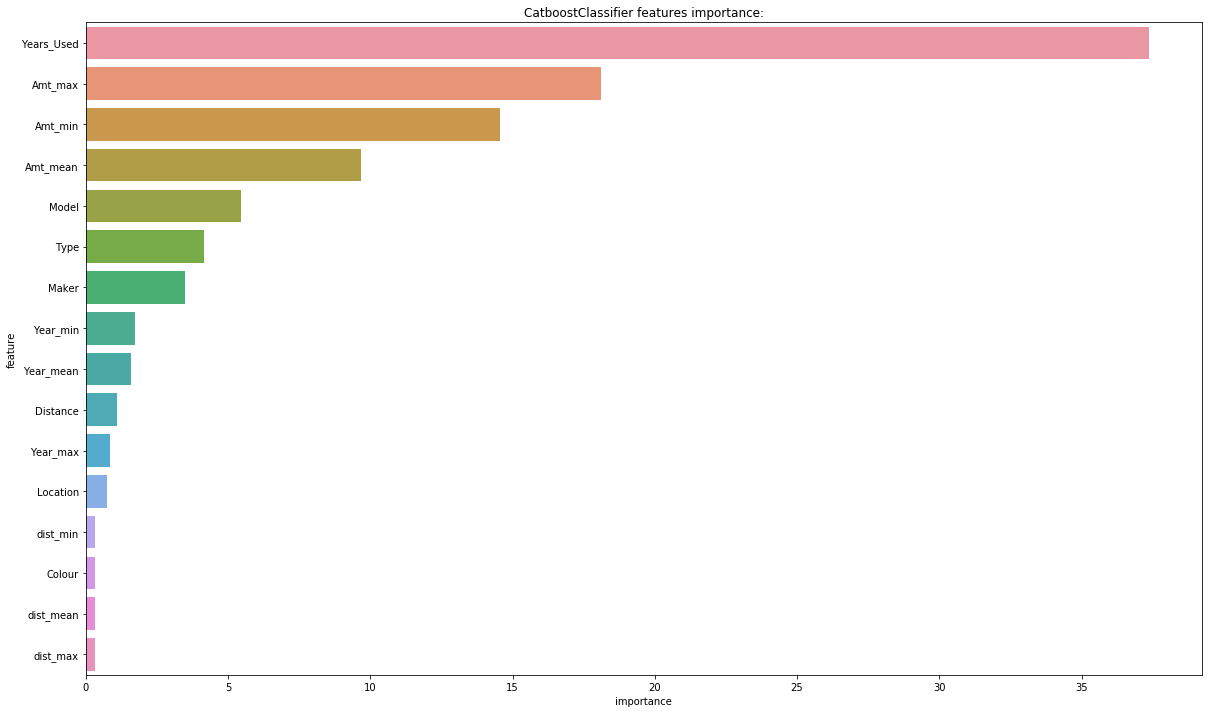

In [74]:
feature_importance_df = pd.DataFrame(model.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X.columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(60))
plt.title('CatboostClassifier features importance:')
plt.show()

### Features Importance Graph_LGB

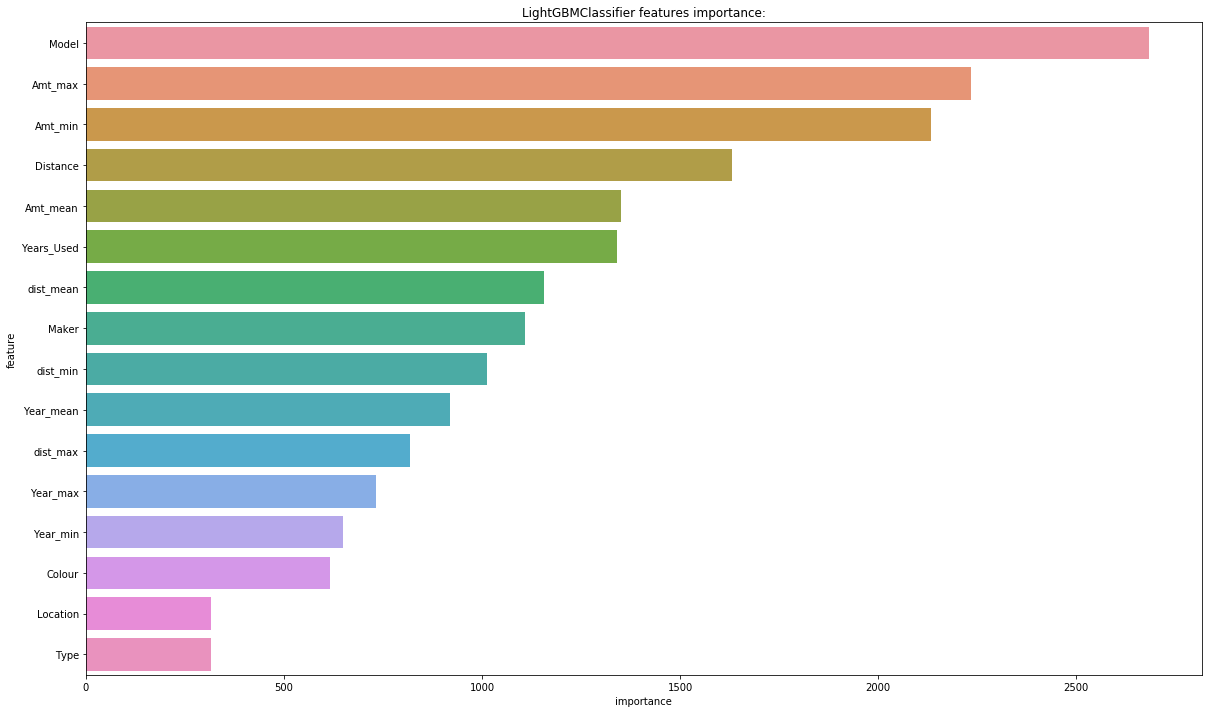

In [79]:
feature_importance_df = pd.DataFrame(model.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X.columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(60))
plt.title('LightGBMClassifier features importance:')
plt.show()

## Submission

In [75]:
sub['Amount (Million Naira)'] =  np.mean(fold_pred_ctb, axis = 0)
sub.head()

,VehicleID,Amount (Million Naira)
0,VHL18518,8.59
1,VHL17149,7.54
2,VHL10927,10.00
3,VHL12909,3.89
4,VHL12348,11.11


In [76]:
sub['Amount (Million Naira)'].mean()

9.860131531894208

In [77]:
sub.to_csv('ctb_grp.csv', index = False)

## Submission_LGB

In [80]:
sub['Amount (Million Naira)'] =  np.mean(fold_pred_lgb, axis = 0)
sub.head()

,VehicleID,Amount (Million Naira)
0,VHL18518,9.59
1,VHL17149,7.36
2,VHL10927,10.94
3,VHL12909,4.01
4,VHL12348,11.84


In [82]:
sub['Amount (Million Naira)'].mean()

10.008902055799492

In [83]:
sub.to_csv('lgb_grp.csv', index = False)